In [62]:
%run my_functions.ipynb

In [64]:
sat_formula = random_kcnf(n_literals=3,n_conjuncts=5,k=3)
#sat_formula = [[-1, -3, -2], [4, 1, -4], [-1, -3, -4]]
sat_formula = [[-2, -1, -3], [2, 3, 1], [2, -3, -1], [2, 1, -3], [-1, -2, -3]]
#sat_formula

3
[2, 1, 3]
[2, 3, 1]
[2, 3, 1]


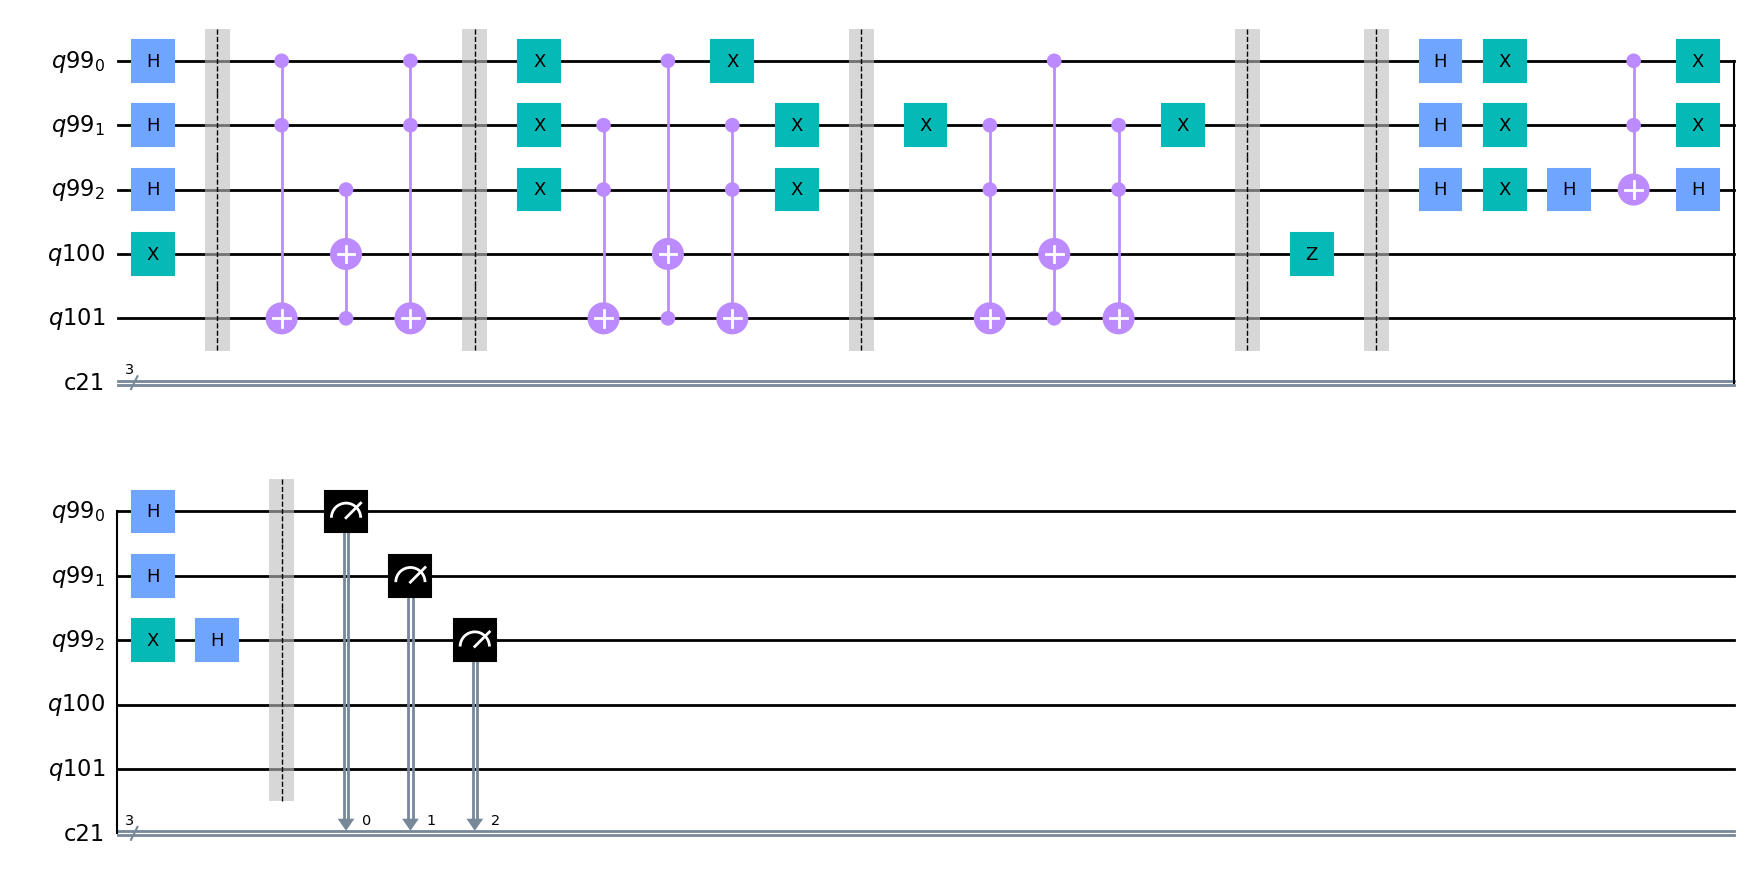

In [66]:
quant_part = [sat_formula[0]]+[sat_formula[1]] + [sat_formula[2]]
qc = hybrid_sat3(quant_part)
qc.draw('mpl')

In [67]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
soln = []
for key,value in counts.items():
    if value>sum(counts.values())/len(counts):
        soln.append(key)

quant_soln = [element[::-1] for element in soln]
print("Measurement results:",counts)
print("Max values above average from the dictionary:", quant_soln)

Measurement results: {'110': 77, '100': 86, '101': 215, '000': 206, '010': 77, '001': 85, '011': 72, '111': 206}
Max values above average from the dictionary: ['101', '000', '111']


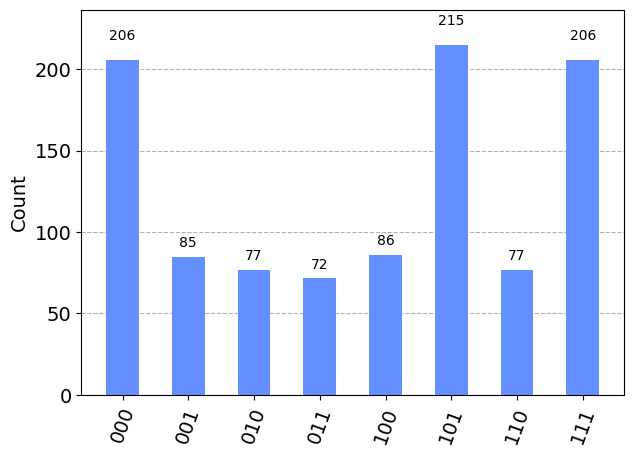

In [68]:
plot_histogram(counts)

In [69]:
# The above values corresponding to max counts are the false solutions. So, one work around is:
#Step 1: verify the above achieved solution using the classical_satchecker function to check if its the True or False solution
#Step 2: If True, continue to solve the rest of the problem
#Step 3: If False, then take the quantum solutions as [All outcomes - Outcomes corresponding to max values] and continue the problem.